In [2]:
import numpy as np
import pandas as pd 
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sys
import time
import keras as keras
import tensorflow as tf
import re #regular expressions

from PIL import Image
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Input, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.layers import Lambda
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import Dropout, Activation, BatchNormalization

print('setup successful!')

setup successful!


In [3]:
from keras.layers import Normalization

In [4]:
# keep the image size constant.
IMAGE_WIDTH = 224    
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3 #RGB, so only 3


# Path where our data is located
base_path = "../input/garbage-classification/garbage_classification/"

# Dictionary to save our 12 classes
categories = {0: 'paper',  1: 'plastic', 2: 'metal', 3: 'trash',
              4: 'shoes', 5: 'clothes', 6: 'glass',
              7: 'biological', 8: 'general'}

flammability:
#Battery: High
#biological: low
#brown-glass: low
#cardboard: high
#clothes: medium
#general: medium
#green-glass: low
#metal: low
#paper: high
#plastic: medium
#shoes: medium
#trash: medium
#white-glass: low

# Create DataFrame

We want to create a data frame that has in one column the filenames of all our images and in the other column the corresponding category. 
We Open the directories in the dataset one by one, save the filenames in the filenames_list and add the corresponding category in the categories_list

In [5]:
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []
base_path = "C:/Users/aakas/Desktop/garbage_classification"
for category in categories:
    #base path: ../input/garbage-classification/garbage_classification/
    filenames = os.listdir(base_path + "/"+ categories[category])
    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)
    

df = pd.DataFrame({
    "filename": filenames_list,
    "category": categories_list
    #"flammability", "resusability", "toxicity", "call"
})
"""
import numpy as np
conditions = [
    (df['category'] == 0),
    (df['category'] == 1),
    (df['category'] == 2),
    (df['category'] == 3),
    (df['category'] == 4),
    (df['category'] == 5),
    (df['category'] == 6),
    (df['category'] == 7),
    (df['category'] == 8),
    (df['category'] == 9),
    (df['category'] == 10),
    (df['category'] == 11),
    (df['category'] == 12)
]

values = ['high', 'high', 'medium', 'low', 'medium', 'high', 'medium', 'medium', 'low', 'low', 'low', 'low', 'medium']

df['Flammability'] = np.select(conditions, values)
"""
print(df)
df.head()

                        filename  category
0               cardboard581.jpg         0
1               cardboard582.jpg         0
2               cardboard583.jpg         0
3               cardboard584.jpg         0
4               cardboard585.jpg         0
...                          ...       ...
4645  Datacluster Trash (95).jpg         8
4646  Datacluster Trash (96).jpg         8
4647  Datacluster Trash (97).jpg         8
4648  Datacluster Trash (98).jpg         8
4649  Datacluster Trash (99).jpg         8

[4650 rows x 2 columns]


,filename,category
0,cardboard581.jpg,0
1,cardboard582.jpg,0
2,cardboard583.jpg,0
3,cardboard584.jpg,0
4,cardboard585.jpg,0


In [6]:
for i in df.index:
    if('biological' in df['filename'][i]):
        df['filename'][i] = 'biological/' + df['filename'][i]
    elif('glass' in df['filename'][i]):
        df['filename'][i] = 'glass/' + df['filename'][i]
    elif('cardboard' in df['filename'][i]):
        df['filename'][i] = 'paper/' + df['filename'][i]
    elif('clothes' in df['filename'][i]):
        df['filename'][i] = 'clothes/' + df['filename'][i]
    elif('metal' in df['filename'][i]):
        df['filename'][i] = 'metal/' + df['filename'][i]
    elif('paper' in df['filename'][i]):
        df['filename'][i] = 'paper/' + df['filename'][i]
    elif('plastic' in df['filename'][i]):
        df['filename'][i] = 'plastic/' + df['filename'][i]
    elif('shoes' in df['filename'][i]):
        df['filename'][i] = 'shoes/' + df['filename'][i]
    elif('trash' in df['filename'][i]):
        df['filename'][i] = 'trash/' + df['filename'][i]
    elif('Datacluster' in df['filename'][i]):
        df['filename'][i] = 'general/' + df['filename'][i]
print(df)

C:\Users\aakas\AppData\Local\Temp\ipykernel_15264\3449730281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'paper/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_15264\3449730281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'paper/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_15264\3449730281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

                                filename  category
0                 paper/cardboard581.jpg         0
1                 paper/cardboard582.jpg         0
2                 paper/cardboard583.jpg         0
3                 paper/cardboard584.jpg         0
4                 paper/cardboard585.jpg         0
...                                  ...       ...
4645  general/Datacluster Trash (95).jpg         8
4646  general/Datacluster Trash (96).jpg         8
4647  general/Datacluster Trash (97).jpg         8
4648  general/Datacluster Trash (98).jpg         8
4649  general/Datacluster Trash (99).jpg         8

[4650 rows x 2 columns]


C:\Users\aakas\AppData\Local\Temp\ipykernel_15264\3449730281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'metal/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_15264\3449730281.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'][i] = 'trash/' + df['filename'][i]
C:\Users\aakas\AppData\Local\Temp\ipykernel_15264\3449730281.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [7]:



# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))

number of elements =  4650


In [8]:
df['category'].value_counts()

0    601
7    585
5    585
6    540
3    535
1    534
2    511
4    509
8    250
Name: category, dtype: int64

In [9]:
df.head()

,filename,category
0,paper/cardboard590.jpg,0
1,biological/biological937.jpg,7
2,clothes/clothes5097.jpg,5
3,clothes/clothes4900.jpg,5
4,paper/paper1043.jpg,0


metal/metal351.jpg metal


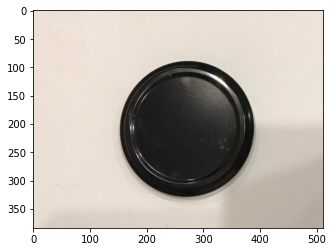

In [11]:
# see sample image, you can run the same cell again to get a different image
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
randomimage = tf.keras.utils.load_img(base_path + "/" +sample['filename'])
print(sample['filename'], categories[sample['category']])

plt.imshow(randomimage)

# Create the model

The steps are:
1. Create an mobilenetv2 model without the last layer and load the ImageNet pretrained weights
2. Add a pre-processing layer
3. Add a pooling layer followed by a softmax layer at the end

In [12]:

import keras.applications.mobilenet_v2 as mobilenetv2

mobilenetv2_layer = mobilenetv2.MobileNetV2(include_top = False, input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS),
 weights = 'C:/Users/aakas/Desktop/programs/NNs/mobileweights.h5')

# We don't want to train the imported weights
mobilenetv2_layer.trainable = False


model = Sequential()
model.add(keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))

#create a custom layer to apply the preprocessing
def mobilenetv2_preprocessing(img):
  return mobilenetv2.preprocess_input(img)

model.add(Lambda(mobilenetv2_preprocessing))

model.add(mobilenetv2_layer)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(len(categories), activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

model

In [14]:
early_stop = EarlyStopping(patience = 2, verbose = 1, monitor='val_categorical_accuracy' , mode='max', min_delta=0.001, restore_best_weights = True)

callbacks = [early_stop] #stores the best model weights here

In [15]:
#Change the categories from numbers to names
df["category"] = df["category"].replace(categories) 

# We first split the data into two sets and then split the validate_df to two sets
train_df, validate_df = train_test_split(df, test_size=0.2)
validate_df, test_df = train_test_split(validate_df, test_size=0.5)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('train size = ', total_train , 'validate size = ', total_validate, 'test size = ', test_df.shape[0])

train size =  3720 validate size =  465 test size =  465


In [16]:
batch_size=100

train_datagen = image.ImageDataGenerator()
    
    ###  Augmentation Start  ###
    
    #rotation_range=30,
    #shear_range=0.1,
    #zoom_range=0.3,
    #horizontal_flip=True,
    #vertical_flip = True,
    #width_shift_range=0.2,
    #height_shift_range=0.2
    
    ##  Augmentation End  ###

train_generator = train_datagen.flow_from_dataframe(train_df, base_path, x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical',  batch_size=batch_size)

Found 3720 validated image filenames belonging to 9 classes.


In [17]:
validation_datagen = image.ImageDataGenerator()

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    base_path, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 465 validated image filenames belonging to 9 classes.


In [18]:
EPOCHS = 10
history = model.fit( #we use generators so that the model can produce the data one at a time, not all can fit at once
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
37/37 [==============================] - 205s 5s/step - loss: 1.1877 - categorical_accuracy: 0.6262 - val_loss: 0.5410 - val_categorical_accuracy: 0.8625
Epoch 2/10
37/37 [==============================] - 80s 2s/step - loss: 0.4175 - categorical_accuracy: 0.8856 - val_loss: 0.4028 - val_categorical_accuracy: 0.8925
Epoch 3/10
37/37 [==============================] - 81s 2s/step - loss: 0.3031 - categorical_accuracy: 0.9157 - val_loss: 0.3351 - val_categorical_accuracy: 0.9100
Epoch 4/10
37/37 [==============================] - 84s 2s/step - loss: 0.2441 - categorical_accuracy: 0.9370 - val_loss: 0.3302 - val_categorical_accuracy: 0.9150
Epoch 5/10
37/37 [==============================] - 78s 2s/step - loss: 0.2023 - categorical_accuracy: 0.9506 - val_loss: 0.2672 - val_categorical_accuracy: 0.9250
Epoch 6/10
37/37 [==============================] - 86s 2s/step - loss: 0.1752 - categorical_accuracy: 0.9561 - val_loss: 0.2843 - val_categorical_accuracy: 0.9150
Epoch 7/10
37/3

In [20]:
model.save("model12.h5")

In [21]:
df['category'].value_counts()

paper         601
biological    585
clothes       585
glass         540
trash         535
plastic       534
metal         511
shoes         509
general       250
Name: category, dtype: int64

To evaluate the performance of our model we will create a test generator to load the images from the input data directory and evaluate the results.

In [22]:
test_datagen = image.ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
    dataframe= test_df,
    directory=base_path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1,
    shuffle=False 
)

Found 465 validated image filenames belonging to 9 classes.


In [23]:
filenames = test_generator.filenames
nb_samples = len(filenames)

_, accuracy = model.evaluate(test_generator)

print('Accuracy on test set = ',  round((accuracy * 100),2 ), '% ') 

465/465 [==============================] - 18s 37ms/step - loss: 0.2397 - categorical_accuracy: 0.9355
Accuracy on test set =  93.55 % 


In [24]:
gen_label_map = test_generator.class_indices
gen_label_map = dict((v,k) for k,v in gen_label_map.items())
print(gen_label_map)

{0: 'biological', 1: 'clothes', 2: 'general', 3: 'glass', 4: 'metal', 5: 'paper', 6: 'plastic', 7: 'shoes', 8: 'trash'}


In [25]:
# get the model's predictions for the test set
preds = model.predict(test_generator, nb_samples)

# Get the category with the highest predicted probability, the prediction is only the category's number and not name
preds = preds.argmax(1)

# Convert the predicted category's number to name 
preds = [gen_label_map[item] for item in preds]

# Convert the pandas dataframe to a numpy matrix
labels = test_df['category'].to_numpy()

print(classification_report(labels, preds))

465/465 [==============================] - 14s 28ms/step
              precision    recall  f1-score   support

  biological       0.98      0.98      0.98        64
     clothes       0.98      0.96      0.97        51
     general       1.00      0.95      0.98        22
       glass       0.85      0.85      0.85        46
       metal       0.91      0.96      0.94        53
       paper       0.96      0.88      0.92        59
     plastic       0.87      0.88      0.87        59
       shoes       0.98      0.97      0.98        63
       trash       0.90      0.98      0.94        48

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465



In [30]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

#load the image
my_image = load_img('C:/Users/aakas/Desktop/programs/NNs/garbage_classification/general/Datacluster Trash (21).jpg', target_size=(224, 224))

#preprocess the image
my_image = img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0) 
my_image = preprocess_input(my_image)


#make the prediction
prediction = model.predict(my_image)
prediction=[np.round(x) for x in prediction]
for i in prediction:
    print(gen_label_map[i.argmax()])


1/1 [==============================] - 0s 48ms/step
general


In [147]:
#print additional info based on the classification
#create dictionary, integrate apis, etc

white-glass
